# Process GLOBALVIEW data
This script processes the GLOBALVIEW CO2 data. it first takes it from a .txt file and filters out the data. It then puts the data into a pandas dataframe.

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
fl = '/data/artemis/observations/globalview/originals/co2_GHGreference_surface_1979-2020.txt'

In [4]:
# Sine of that latitudes 
sin_of_lats = np.asarray([-1.00, -0.95, -0.90, -0.85, -0.80, -0.75, -0.70, -0.65, -0.60, -0.55,  
-0.50,  -0.45,  -0.40,  -0.35, -0.30,  -0.25,  -0.20,  -0.15,  -0.10,  -0.05,   
0.00,   0.05,   0.10,   0.15,   0.20,   0.25,   0.30,   0.35,   0.40,   0.45,   
0.50,   0.55,   0.60,   0.65,   0.70,   0.75,   0.80,   0.85,   0.90,   0.95,   1.00])

# Convert to degrees 
lats = np.arcsin(sin_of_lats)*180/np.pi

In [6]:
df = pd.read_table(fl, skiprows=80, delim_whitespace=True, header=None)
df = df.set_index(list(df)[0]).iloc[:, ::2]
df.columns = lats
df.index.name = 'year'

In [7]:
np.diff(lats)

array([18.19487234,  7.64706042,  5.94639785,  5.08156703,  4.53972446,
        4.16337389,  3.88540213,  3.67170423,  3.50288468,  3.36701297,
        3.25631605,  3.16550547,  3.09086336,  3.02971199,  2.98009094,
        2.94055315,  2.91003247,  2.88775608,  2.87318649,  2.86598398,
        2.86598398,  2.87318649,  2.88775608,  2.91003247,  2.94055315,
        2.98009094,  3.02971199,  3.09086336,  3.16550547,  3.25631605,
        3.36701297,  3.50288468,  3.67170423,  3.88540213,  4.16337389,
        4.53972446,  5.08156703,  5.94639785,  7.64706042, 18.19487234])

In [8]:
df.head()

,-90.000000,-71.805128,-64.158067,-58.211669,-53.130102,-48.590378,-44.427004,-40.541602,-36.869898,-33.367013,...,33.367013,36.869898,40.541602,44.427004,48.590378,53.130102,58.211669,64.158067,71.805128,90.000000
year,,,,,,,,,,,,,,,,,,,,,
1979.000000,334.648,334.658,334.664,334.661,334.647,334.619,334.580,334.531,334.476,334.418,...,338.785,338.977,339.082,339.139,339.181,339.229,339.288,339.353,339.416,339.472
1979.020833,334.570,334.592,334.613,334.628,334.632,334.624,334.605,334.576,334.542,334.503,...,339.215,339.419,339.531,339.587,339.618,339.642,339.666,339.690,339.713,339.733
1979.041667,334.481,334.515,334.550,334.583,334.607,334.622,334.627,334.625,334.616,334.604,...,339.593,339.796,339.906,339.957,339.979,339.988,339.994,339.998,340.001,340.003
1979.062500,334.381,334.425,334.475,334.524,334.569,334.608,334.639,334.664,334.684,334.701,...,339.905,340.095,340.195,340.239,340.256,340.263,340.268,340.273,340.278,340.282
1979.083333,334.274,334.328,334.390,334.455,334.519,334.580,334.635,334.686,334.732,334.774,...,340.156,340.323,340.407,340.442,340.459,340.474,340.496,340.521,340.547,340.569


/home/vbennington/.conda/envs/dev2/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/vbennington/.conda/envs/dev2/lib/python3.6/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/vbennington/.conda/envs/dev2/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


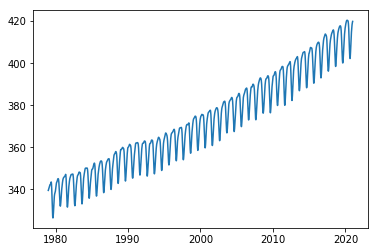

In [9]:
plt.plot(df.index, df.iloc[:,40])

In [10]:
print(np.shape(df))

(2017, 41)


# Create NetCDF File
the NOAA MLB product uses ~weekly data. there are 48 equal time steps each year (~7.6 days)

In [40]:
dir_obs = '/data/artemis/observations/globalview/processed'

In [28]:
### ================================================
### force time vector to be proper format and range
### ================================================
dates = pd.date_range(start='1979-01-01T00:00:00.000000000', 
                      end='2021-01-01T00:00:00.000000000', periods=2017)
da_dates = xr.DataArray(dates, dims='time')

In [29]:
print(np.shape(df.values))
print(np.shape(da_dates))
print(np.shape(lats))

(2017, 41)
(2017,)
(41,)


In [30]:
ds_out = xr.Dataset(
    {
    'XCO2':(['time','lat'], df.values ),
    },

    coords={
    'lat': (['lat'], lats),
    'time': (['time'], da_dates)
    })

In [31]:
ds_out

<xarray.Dataset>
Dimensions:  (lat: 41, time: 2017)
Coordinates:
  * lat      (lat) float64 -90.0 -71.81 -64.16 -58.21 ... 58.21 64.16 71.81 90.0
  * time     (time) datetime64[ns] 1979-01-01 ... 2021-01-01
Data variables:
    XCO2     (time, lat) float64 334.6 334.7 334.7 334.7 ... 419.9 419.9 419.9

In [32]:
ds_out_monthly = ds_out.resample(time='1MS').mean()

In [33]:
ds_out_monthly

<xarray.Dataset>
Dimensions:  (lat: 41, time: 505)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-01-01
  * lat      (lat) float64 -90.0 -71.81 -64.16 -58.21 ... 58.21 64.16 71.81 90.0
Data variables:
    XCO2     (time, lat) float64 334.5 334.5 334.5 334.6 ... 419.9 419.9 419.9

# Repeat along dimension

In [34]:
lon = np.arange(-179.5,180,1)
ds_lon = xr.DataArray(np.zeros([len(lon)]), coords=[('lon', lon)])
ds_data, ds_mask = xr.broadcast(ds_out_monthly, ds_lon)

In [35]:
ds_data_interp = ds_data.interp(lat=np.arange(-89.5, 90, 1), method='linear')

In [36]:
ds_data_interp

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 505)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-01-01
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    XCO2     (lat, time, lon) float64 334.5 334.5 334.5 ... 419.9 419.9 419.9

In [37]:
dates = pd.date_range(start='1979-01-01T00:00:00.000000000', 
                      end='2021-01-01T00:00:00.000000000',freq='MS')+ np.timedelta64(14, 'D')
da_dates = xr.DataArray(dates, dims='time')
print(da_dates)

<xarray.DataArray (time: 505)>
array(['1979-01-15T00:00:00.000000000', '1979-02-15T00:00:00.000000000',
       '1979-03-15T00:00:00.000000000', ..., '2020-11-15T00:00:00.000000000',
       '2020-12-15T00:00:00.000000000', '2021-01-15T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-15 1979-02-15 ... 2021-01-15


In [38]:
ds_data_interp['time'] = da_dates

In [39]:
ds_data_interp

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 505)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-15 1979-02-15 ... 2021-01-15
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    XCO2     (lat, time, lon) float64 334.5 334.5 334.5 ... 419.9 419.9 419.9

In [56]:
#ds_data_interp= ds_data_interp.transpose('time', 'lat', 'lon')
#ds_data_interp = ds_data_interp.rename({"lat":"ylat","lon":"xlon"})
ds_data_interp.to_netcdf(f'{dir_obs}/GLOBALVIEW_XCO2_1x1_197901-202101.nc')

In [47]:
ds = xr.load_dataset(f'{dir_obs}/GLOBALVIEW_XCO2_1x1_197901-202101.nc')

In [48]:
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 505)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-15 1979-02-15 ... 2021-01-15
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    XCO2     (time, lat, lon) float64 334.5 334.5 334.5 ... 419.9 419.9 419.9

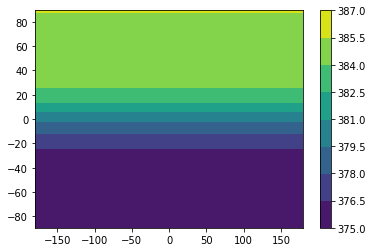

In [50]:
fig = plt.figure()
plt.contourf(ds.lon,ds.lat,ds.XCO2[315,:,:])
plt.colorbar()

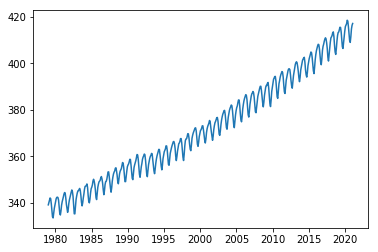

In [52]:
fig = plt.figure()
plt.plot(ds.time,ds.XCO2[:,120,180])